In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
url='https://raw.githubusercontent.com/skathirmani/datasets/master/data_pca.csv'
data_pca=pd.read_csv(url)
print(data_pca.shape)
data_pca.head()

(1010, 50)


,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,...,Sensor41,Sensor42,Sensor43,Sensor44,Sensor45,Sensor46,Sensor47,Sensor48,Sensor49,Sensor50
0,23.33984,23.33984,23.63281,23.63281,23.53516,23.33984,22.94922,23.04688,23.14453,23.14453,...,23.53516,23.14453,23.24219,23.53516,23.73047,23.63281,23.43750,22.94922,22.94922,23.04688
1,23.33984,23.33984,23.73047,23.63281,23.53516,23.43750,23.04688,23.14453,23.24219,23.24219,...,23.43750,23.14453,23.14453,23.53516,23.73047,23.63281,23.53516,23.04688,22.94922,23.04688
2,23.43750,23.43750,23.63281,23.63281,23.53516,23.33984,22.94922,23.14453,23.24219,23.24219,...,23.53516,23.24219,23.24219,23.63281,23.73047,23.73047,23.53516,23.24219,23.04688,23.04688
3,23.33984,23.33984,23.63281,23.63281,23.53516,23.33984,22.94922,23.14453,23.24219,23.24219,...,23.53516,23.14453,23.33984,23.63281,23.73047,23.73047,23.43750,23.04688,23.04688,23.04688
4,23.43750,23.43750,23.73047,23.73047,23.63281,23.43750,23.04688,23.24219,23.24219,23.24219,...,23.53516,23.24219,23.33984,23.63281,23.73047,23.63281,23.53516,22.94922,23.04688,23.14453


In [6]:
scaler=StandardScaler()
scaler.fit(data_pca)
data_scaled=pd.DataFrame(scaler.transform(data_pca),columns=data_pca.columns)

In [8]:
evalues,evectors=np.linalg.eig(data_scaled.corr())

## Scree plot

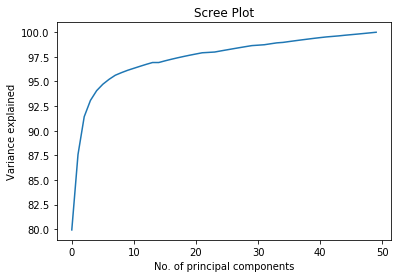

In [15]:
plt.plot(np.cumsum(evalues)/np.sum(evalues)*100)
plt.xlabel('No. of principal components')
plt.ylabel('Variance explained')
plt.title('Scree Plot')
plt.show()

In [18]:
print(np.cumsum(evalues)/np.sum(evalues)*100)
pca=PCA(n_components=7)
pca.fit(data_scaled)
pcs=pd.DataFrame(pca.transform(data_scaled))

[ 79.92623489  87.58198071  91.42307882  93.07300639  94.06657305
  94.72166515  95.21760384  95.63392093  95.89836234  96.1374553
  96.34234168  96.54519125  96.74313109  96.92541639  96.92541639
  97.0953257   97.25209193  97.39997226  97.53852497  97.66978153
  97.79400431  97.9157424   97.95174402  97.99070229  98.10483918
  98.21609697  98.32604361  98.43433075  98.54000729  98.64371721
  98.68668522  98.7319673   98.82807285  98.9208342   98.96807965
  99.05593146  99.14074471  99.22304453  99.30296282  99.3818466
  99.45569541  99.52557697  99.57795073  99.63181159  99.69782487
  99.75537867  99.81422074  99.87427169  99.93661853 100.        ]


In [25]:
a=[]
for i in np.array(np.cumsum(evalues)/np.sum(evalues)*100):
    a.append(i)
c=0
for i in a:
    if i>=95:
        c=c+1
print(c)

44
